# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset using pandas
data = pd.read_csv("VOW3.DE_max.csv")

In [3]:
data = data.tail(120)

# Linear Regression Analysis

## Imports

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
import time
import datetime

## Loading Data into np array

In [5]:
stocks_X = []
stocks_Y = []

for index, row in data.iterrows():
    element = datetime.datetime.strptime(row['Date'],"%Y-%m-%d")
    timestamp = datetime.datetime.timestamp(element)
    stocks_X.append([timestamp]) 
    stocks_Y.append([row['Close']])

stocks_X = np.array(stocks_X)
stocks_Y = np.array(stocks_Y)

stocks_X_train = stocks_X[:-30]
stocks_X_test = stocks_X[-30:]

stocks_Y_train = stocks_Y[:-30]
stocks_Y_test = stocks_Y[-30:]

## Normalizing

In [6]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#rescaled_data = scaler.fit_transform(stocks_X)

#print('After Rescaling:')
#np.set_printoptions(precision=3)
#rescaled_data

## Regression

In [62]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(stocks_X_train, stocks_Y_train)

# Make predictions using the testing set
stocks_Y_pred = regr.predict(stocks_X_test)
stocks_Y_pred_train = regr.predict(stocks_X_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(stocks_Y_test, stocks_Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(stocks_Y_test, stocks_Y_pred))

Coefficients: 
 [[2.27277355e-06]]
Mean squared error: 643.79
Coefficient of determination: -0.73


## Plot

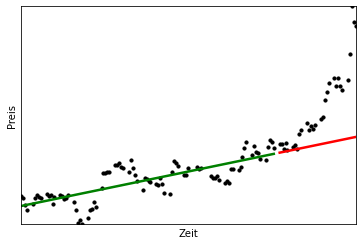

In [65]:
%matplotlib inline


# Plot outputs
plt.scatter(stocks_X, stocks_Y, 10, color='black', alpha=1)
plt.plot(stocks_X_test, stocks_Y_pred, color='red', linewidth=2.5)
plt.plot(stocks_X_train, stocks_Y_pred_train, color='green', linewidth=2.5)
plt.xlim(min(stocks_X),max(stocks_X))
plt.ylim(min(stocks_Y),max(stocks_Y))
plt.ylabel("Preis")
plt.xlabel("Zeit")

plt.xticks(())
plt.yticks(())

plt.show()